# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


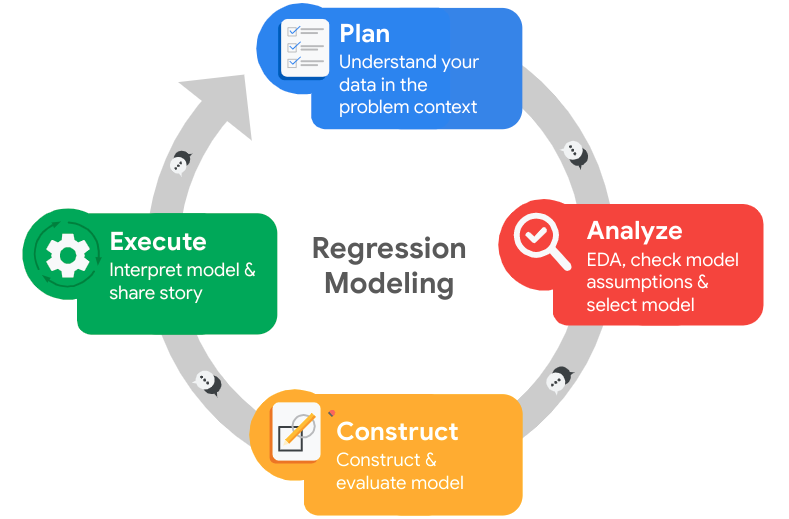

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




# Answers

- The stakeholders for this project are the management team from Sailfor Motors.
- I'm trying to develop an algorithm that will predict wheter an employee will leave or stay with the company by looking at relevant features that could correlate with the employee satisfaction.
- There is a satisfaction column for employees, however , droping this column is a better step to avoid any bisas.
- I will be using the notebooks from the "Go Beyond the Numbers" course and will implement their EDA practices to ensure I have the highest quality data for my model.
- In order to complete the planning stage I will refer to the final course of the "Foundations to Data Science" course in order to properly structure my project proposal and define goals accodingly.
- This project deals with a very important ethical consideration which is employee livelihood. Because we are creating an algorithm that basically tells the company if this employee is a valuable asset that will stick around and is worth the investment, we must make sure that our training data contains no bias towards a specific type of employees. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import pandas as pd 
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier 
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

# For metrics and helpful functions
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,\
f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ### 
df0=df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                        'Work_accident':'work_accident',
                        'Department':'department',
                        'time_spend_company':'tenure',
                       'left':'left'})

# Display all column names after the update
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1=df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

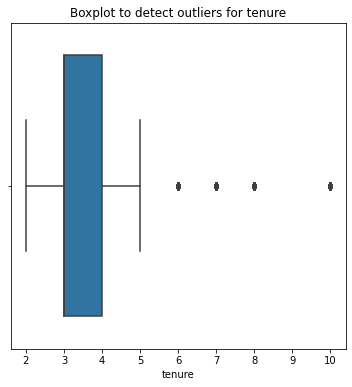

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure')
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25=df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

### Charts


In [13]:
import matplotlib.pyplot as plt

def pie_chart(data, colname):
    # Value counts
    vc_df = data[colname].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
    total_of_counts = vc_df['counts'].sum()

    # Custom label function
    def actopct_formula1(prct_value):
        absolute = round(total_of_counts * prct_value / 100)
        return f"{round(prct_value, 1)}%\n{absolute}"

    # Plotting
    fig = plt.figure(figsize=(6, 6))
    plt.pie(vc_df['counts'], labels=vc_df['sub_cat_values'],
            autopct=actopct_formula1, textprops={'fontsize': 14, 'color': 'w'})
    plt.title(f"Pie chart for '{colname}'")
    plt.legend(title=colname, loc='best', labels=vc_df['sub_cat_values'], bbox_to_anchor=(1.2, 1.0))
    plt.show()


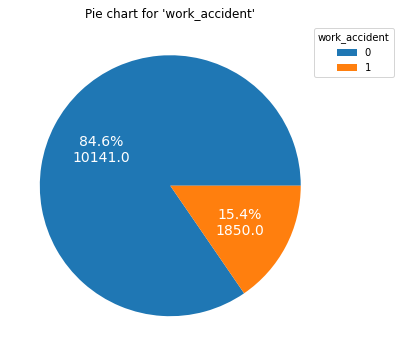

In [14]:
pie_chart(df1,'work_accident')

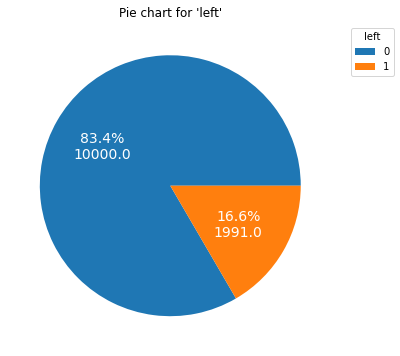

In [15]:
pie_chart(df1,'left')

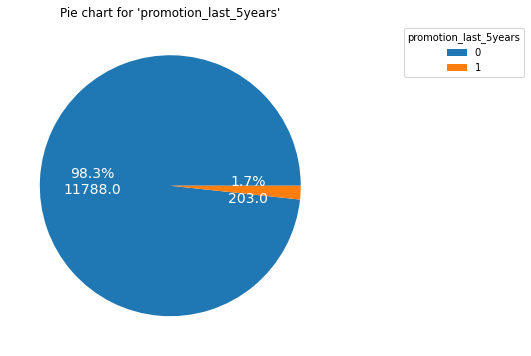

In [16]:
pie_chart(df1,'promotion_last_5years')

In [17]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [18]:
def bar_plot(data,colname):
    plt.figure(figsize=(8,5))
    plt.bar(data[colname].unique(),data[colname].value_counts(),width=0.8)
    plt.title('Bar plot for \''+colname+'\'')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

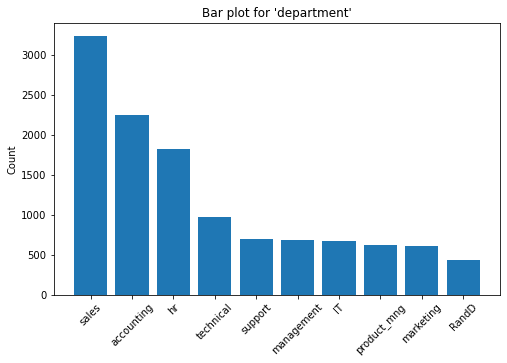

In [19]:
bar_plot(df1,'department')

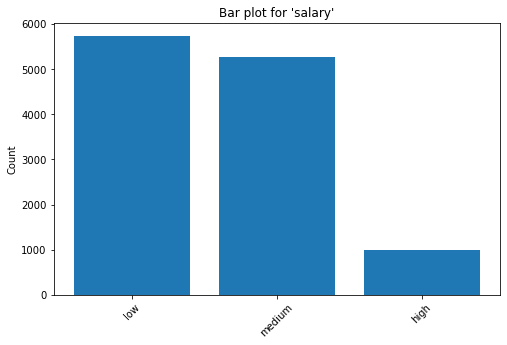

In [20]:
bar_plot(df1,'salary')

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answers**


- There are 10 departments and 3 classes for salary levels. There were no rows with missing values, however, there were over 3000 rows that were duplicates from one another. And almost 800 rows of the employe tenure column where outliers. We created a new dataframe for the employee tenure without outliers in case the model we chose for predicting turn-over rates is sensitve to outliers
- So far the only distribution we have observed was for the employee tenure and it was a discrete distribution, we could model this ditribution as a Poisson distribution. We noticed that employees that have been with the company for over 5 yrs are considered outliers.
- The only transformation we applied thus far has been to remove the outliers in employee tenure because certain models such a decision trees can be very sensitive to outlier data.
- Some of the purposes of performing EDA is to eliminate any problematic bias in the data, and ensure the quality of the data meets the minimum requirements for our model. We also perform EDA in order to understand the underlyin distributions and correlations between the variables in our dataset.
- So far the only resources I've used have been notebooks from previous courses and reference guides, in order to remember how to manage certain aspects of EDA.
- Some ethical considerations at this point are that we might be overlooking important personel by excluding employees that have been working with the company for over 5 years.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [21]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

# Boxplot for satisfaction level vs people who left

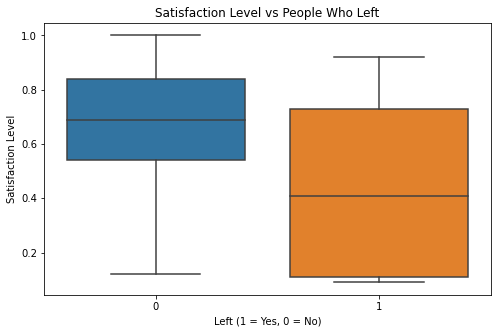

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x='left', y='satisfaction_level')
plt.title('Satisfaction Level vs People Who Left')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction Level')
plt.show()


It shows that people with lower satisfaction level tend to leave 

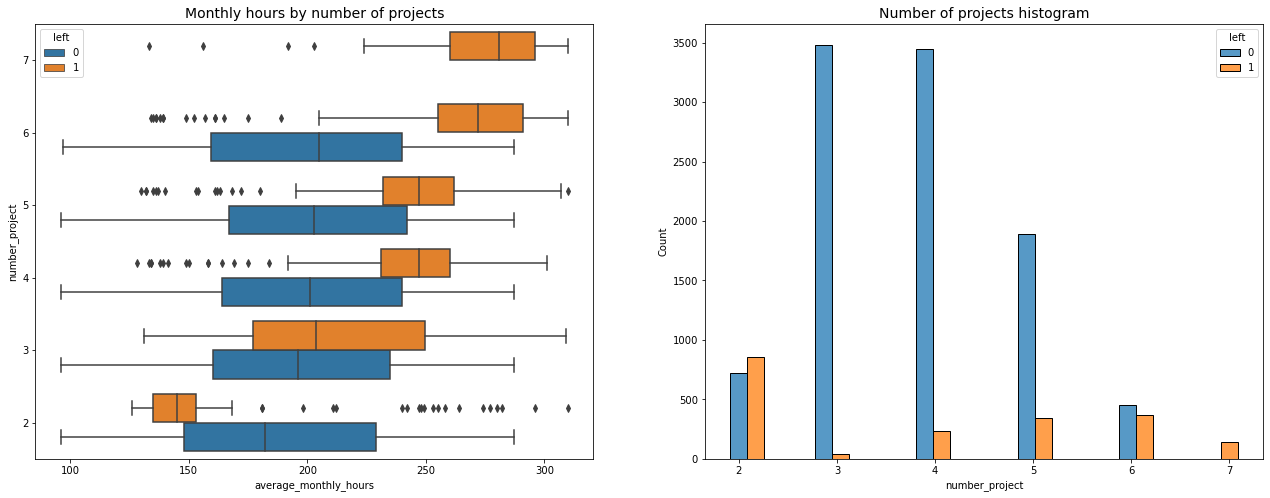

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

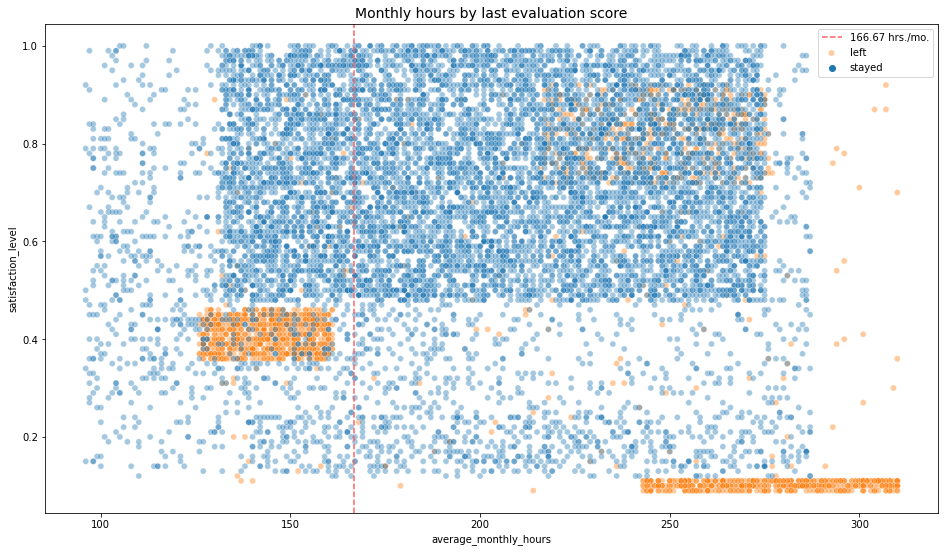

In [25]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

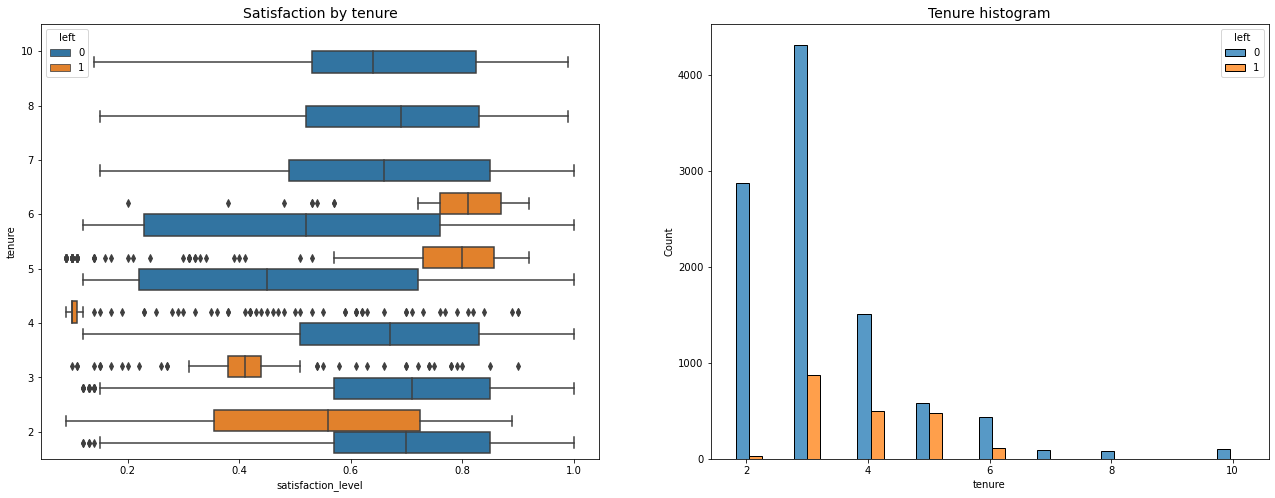

In [26]:
# Create a plot as needed 
 
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

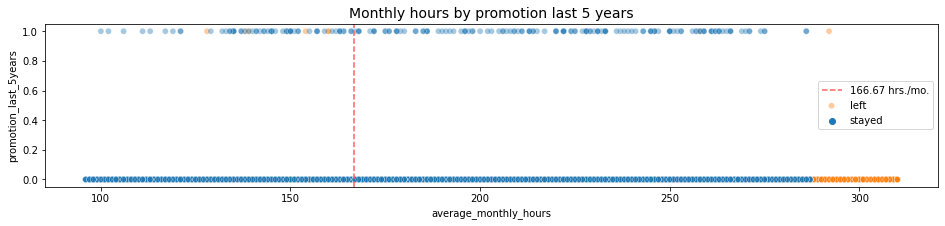

In [27]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [28]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [29]:
df1["department"].value_counts(normalize=True)*100

sales          27.011926
technical      18.714036
support        15.186390
IT              8.139438
RandD           5.787674
product_mng     5.720957
marketing       5.612543
accounting      5.178884
hr              5.012092
management      3.636060
Name: department, dtype: float64

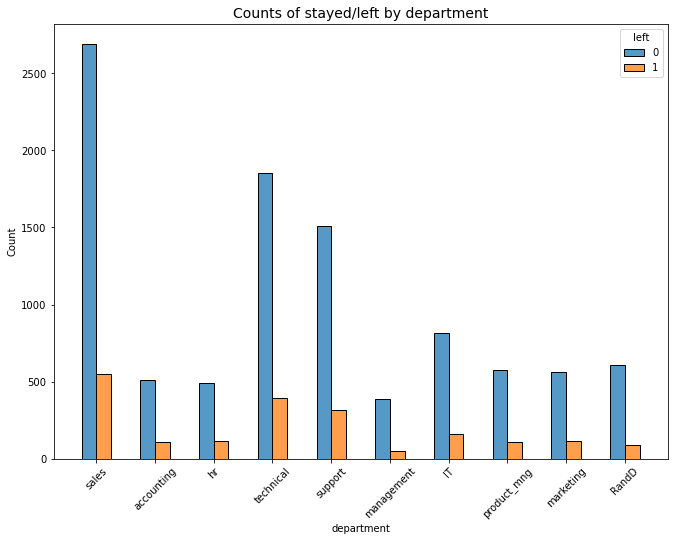

In [30]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


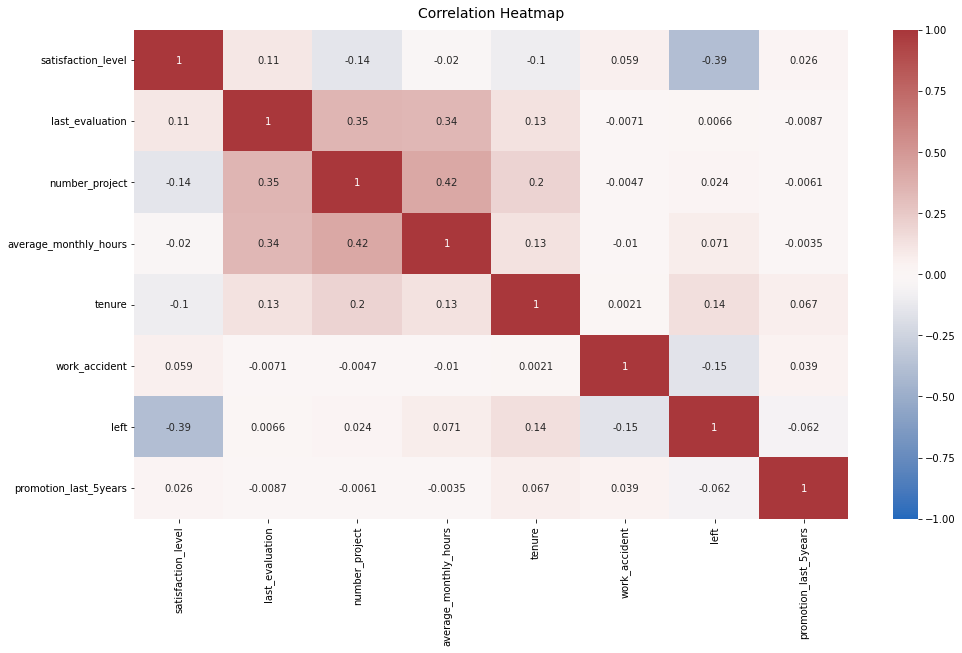

In [31]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

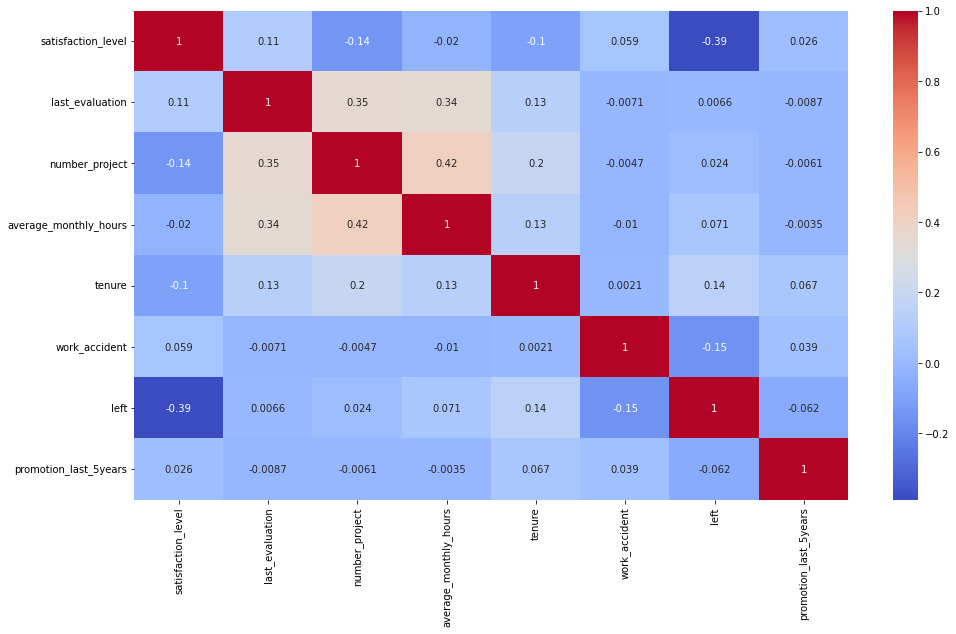

In [32]:
corr=df0.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- satisfaction_level plotted over average_monthly_hours shows 3 groupings of satisfaction. There is a group with low satisfaction who didn't work as much as other employees. The next group had high satisfaction and worked a lot. The last group shows has an uncanny cluster where employees worked a lot but are highly unsatisfied.
- The independent variables will be satisfaction_level, last_evaluation, number_project, average_monthly_hours, tenure, work_accident, promotion_last_5years, salary, and department. These logically make the most sense in predicting if an employee will leave. If there is a scenario where we don't know the column names, then one possible way to find the indepedent variables are to create a model with all variables then use backwards elimination on variables with negligible prediction power to keep the variables with high prediction power.
- Decision Tree, Random Forest, and XGBoost models fit the data very well. The precision, recall, F1, accuracy, and ROC/AUC scores were all above 85%. The scores for logistic regression were underwhelming.
- In the future, we can try removing last_evaluation and fitting that model do the data. There could be data leakage where last_evalation might be known in the testing set.
- Previous notebooks were used as resources and guides.
- Outliers in tenure were dropped for logistic regression modeling, which mean employees over 5.5 years of tenure were not included. satisfaction_level was dropped during feature engineering because of the odd clustering mentioned previously.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

left column will be the target variable with 1 indicating that the employee left and 0 indicating employee didnt leave.
Since left column consists of 0 and 1 leading to categorical values . Therefore this is binary classification.


### Identify the types of models most appropriate for this task.

Logistic regression and tree-based machine learning will be the models used. Tree-based machine learning does not require normal distribution so it it will be able to give a suitable performing model despite the dataset having multimodal distributions in satisfaction_level, last_evaluation, and average_monthly_hours.

# Logistic regression 

### Modeling



In [33]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

**Target Variable:**


left

**Independent variable:**

satisfaction_level

last_evaluation

number_project

average_monthly_hours

tenure

work_accident

promotion_last_5years

department

salary

department and salary are object therefore we need to convert it to numerical 

In [34]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
df_enc['salary'].unique

<bound method Series.unique of 0        0
1        1
2        1
3        0
4        0
        ..
11995    2
11996    2
11997    2
11998    2
11999    0
Name: salary, Length: 11991, dtype: int8>

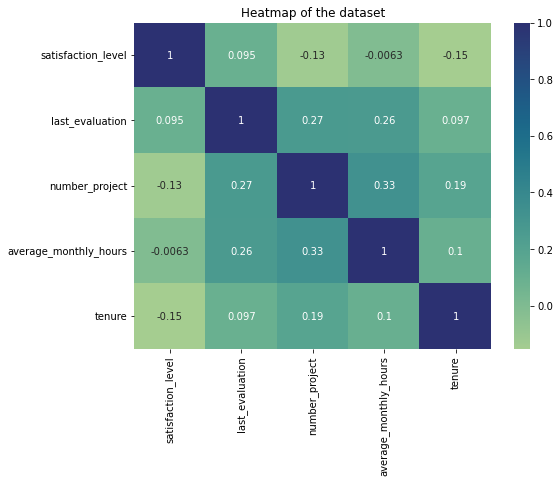

In [36]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

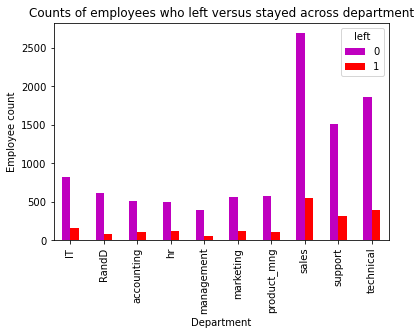

In [37]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [38]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [40]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [44]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

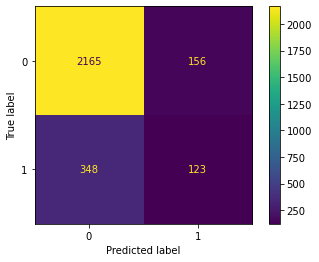

In [45]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [46]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.



In [47]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.



# Second model -Tree Based Model

In [48]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [49]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

In [51]:
decision_tree=DecisionTreeClassifier(random_state=0)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
clf_dt = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc', verbose=1)

In [52]:
%%time
clf_dt.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 3.05 s, sys: 0 ns, total: 3.05 s
Wall time: 3.04 s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    2.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                

In [53]:
clf_dt.best_params_


{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [54]:
clf_dt.best_score_


0.969819392792457

The AUC score is really high (1.0 is the maximum), so it performs well in predicting if an employee will leave.



In [55]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
 # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table

In [56]:
cv_results_dt = make_results('Decision Tree CV', clf_dt, 'auc')
cv_results_dt

,Model,Precision,Recall,F1,Accuracy,AUC
0,Decision Tree CV,0.914552,0.916949,0.915707,0.971978,0.969819


In [57]:
clf_log = LogisticRegression(random_state=42, max_iter=500, verbose=1).fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.7s finished


In [58]:
y_pred_lr = clf_log.predict(X_test)


In [59]:
# Get evaluation statistics

# Get precision score
pc_lr = precision_score(y_test, y_pred_lr)
print('The precision score is {pc:.6f}'.format(pc=pc_lr))

# Get recall score
rc_lr = recall_score(y_test, y_pred_lr)
print('The recall score is {rc:.6f}'.format(rc=rc_lr))

# Get accuracy score
ac_lr = accuracy_score(y_test, y_pred_lr)
print('The accuracy score is {ac:.6f}'.format(ac=ac_lr))

# Get F1 score
f1_lr = f1_score(y_test, y_pred_lr)
print('The F1 score is {f1:.6f}'.format(f1=f1_lr))

# Get ROC AUC score
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print('The ROC AUC score is {roc_auc:.6f}'.format(roc_auc=roc_auc_lr))

The precision score is 0.454082
The recall score is 0.178715
The accuracy score is 0.827885
The F1 score is 0.256484
The ROC AUC score is 0.567957


In [60]:
results_lr = pd.DataFrame()
results_lr = pd.DataFrame({'Model': 'Logistic Regression',
                        'Precision': [pc_lr],
                        'Recall': [rc_lr],
                        'F1': [f1_lr],
                        'Accuracy': [ac_lr],
                        'AUC': [roc_auc_lr]
                        })
results_lr

,Model,Precision,Recall,F1,Accuracy,AUC
0,Logistic Regression,0.454082,0.178715,0.256484,0.827885,0.567957


In [61]:
# Combine new scores with results
cv_results = pd.concat([results_lr, cv_results_dt]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,Decision Tree CV,0.914552,0.916949,0.915707,0.971978,0.969819
1,Logistic Regression,0.454082,0.178715,0.256484,0.827885,0.567957


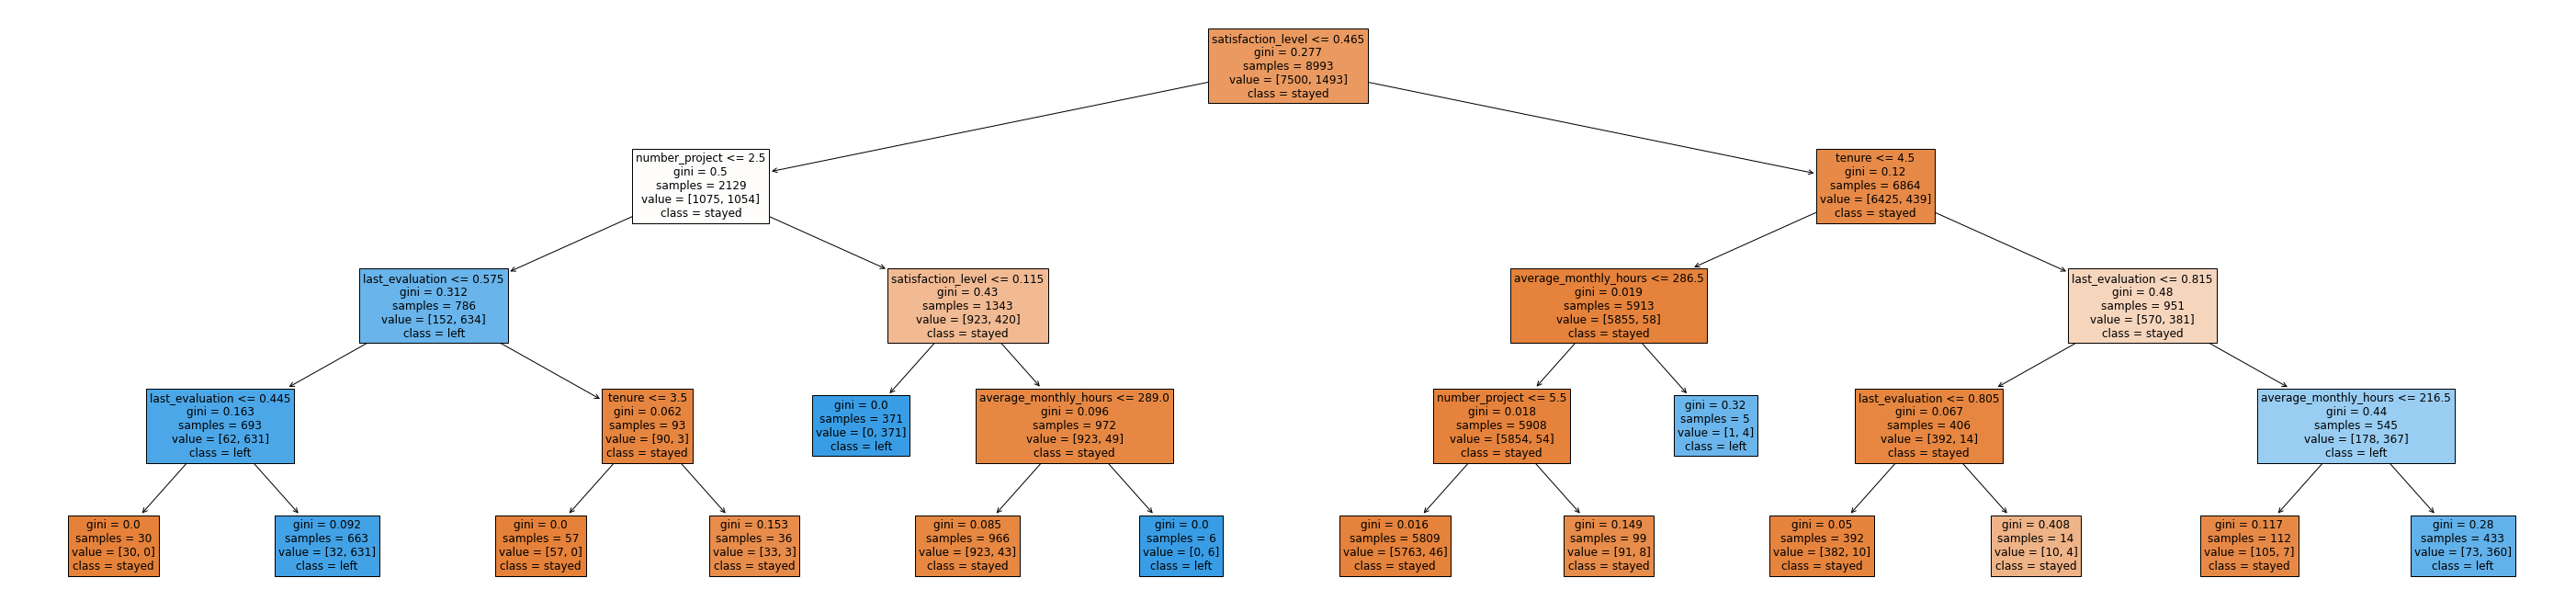

In [62]:
from sklearn.tree import plot_tree
# Plot the tree
plt.figure(figsize=(50,12))
plot_tree(clf_dt.best_estimator_, max_depth=4, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

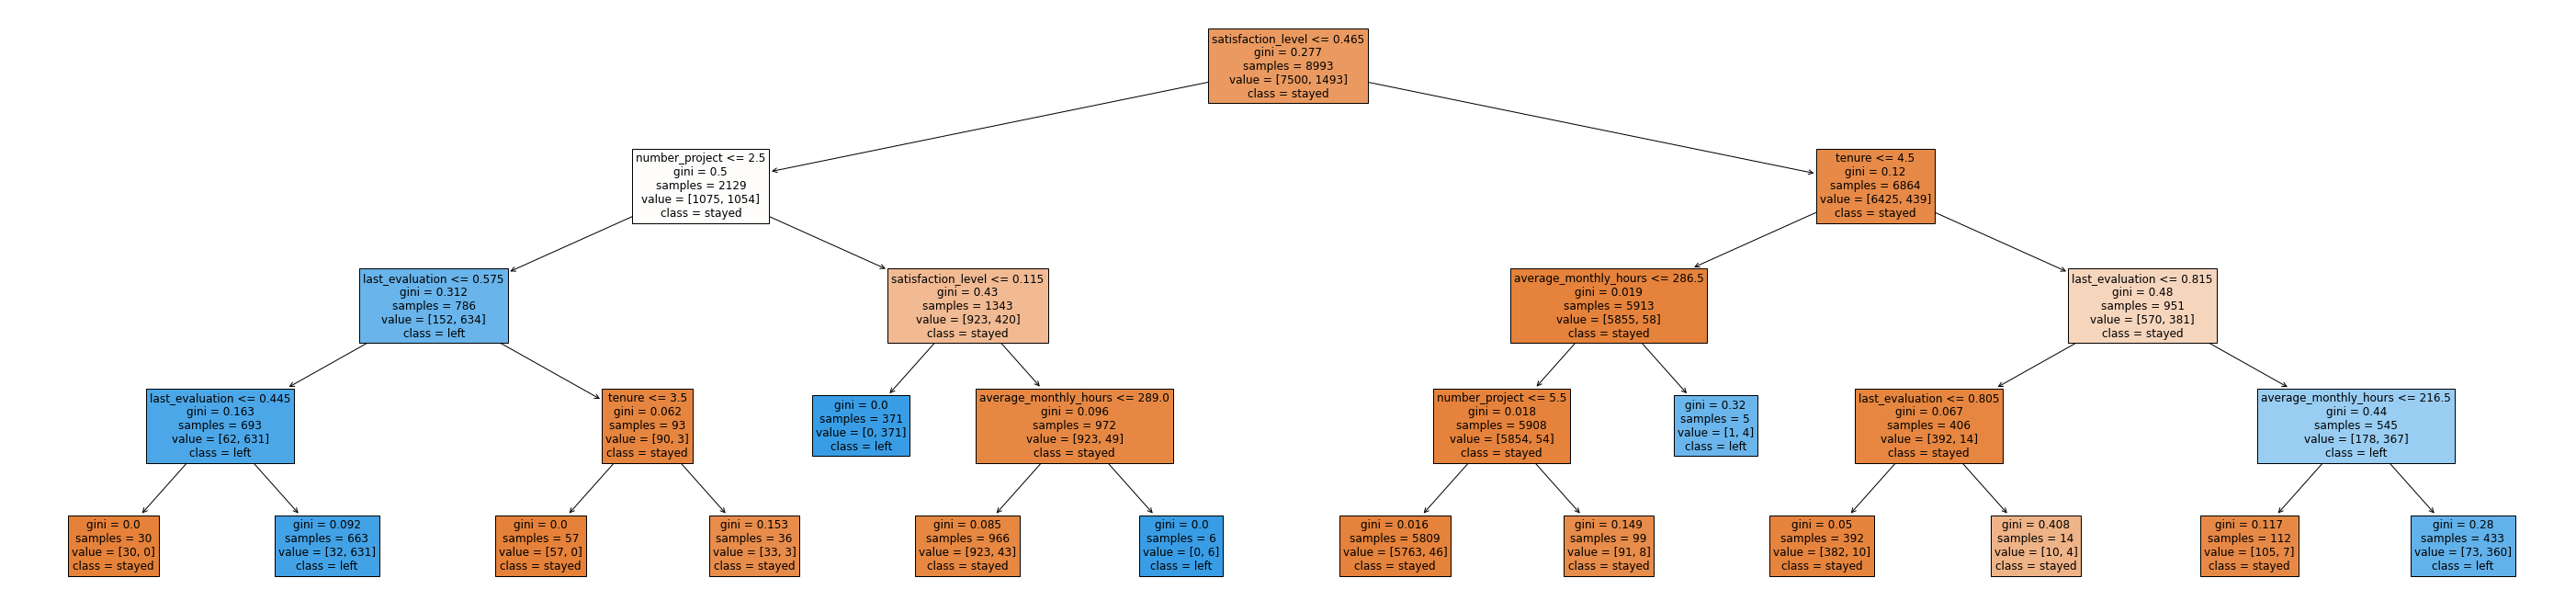

In [63]:

# Plot the tree
plt.figure(figsize=(50,12))
plot_tree(clf_dt.best_estimator_, max_depth=4, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

The first line of information in each node is the feature and split point that the model identified as being most predictive. In other words, this is the question that is being asked at that split. For our root node, the question was: Is the employee satisfaction less than or equal to 0.465?

At each node, if the answer to the question it asks is "yes," the sample would move to the child node on the left. If the answer is "no," the sample would go to the child node on the right.

gini refers to the node's Gini impurity. This is a way of measuring how "pure" a node is. The value can range from 0 to 0.5. A Gini score of 0 means there is no impurity—the node is a leaf, and all of its samples are of a single class. A score of 0.5 means the classes are all equally represented in that node.

samples is simply how many samples are in that node, and value indicates how many of each class are in the node. Returning to the root node, we have value = [7500, 1493]. Notice that these numbers sum to 8,993, which is the number of samples in the node. This tells us that 7,500 employees in this node stayed (y=0) and 1,493 employees left (y=1).

Lastly, we have class. This tells us the majority class of the samples in each node.

This plot tells us that, if we could only do a single split on a single variable, the one that would most help us predict whether an employee will leave is their satisfaction_level.

If we look at the nodes at depth one, we notice that number_project and tenure also are both strong predictors (relative to the features we have) of whether or not they will leave.

It's worth noting that there is no single question that can be asked—for any feature—that would cause a majority of samples in one of the child nodes to be of class left (y=1). The tree must get to depth two (i.e., two questions must be asked) before this happens.

In [64]:
# Create function to find `feature_importances_` for model
def model_importances(model, x_data):
    '''
    Accepts as argument model object (best_estimator_), X data (test or validate). 
    Returns a dataframe of feature_importances.
    '''

    #df_importances = pd.DataFrame(model.best_estimator_.feature_importances_, columns=X.columns)
    df_importances = pd.DataFrame(model.feature_importances_, 
                                    columns=['gini_importance'], index=x_data.columns)
    
    df_importances = df_importances.sort_values(by='gini_importance', ascending=False)

    # Only extract the features with importances > 0
    df_importances = df_importances[df_importances['gini_importance'] != 0]
    return df_importances

In [65]:
dt_importances=model_importances(clf_dt.best_estimator_,X)
dt_importances

,gini_importance
satisfaction_level,0.524622
last_evaluation,0.178501
tenure,0.120792
number_project,0.117102
average_monthly_hours,0.058983


In [66]:
def model_importances_plot(model, x_data):
    '''
    Accepts as argument model object, X data (test or validate). 
    Returns a plot of feature_importances.
    ''' 
    
    importances = model.feature_importances_

    forest_importances = pd.Series(importances, index=x_data.columns).sort_values(ascending=False)

    fig, ax = plt.subplots()
    ax.set_title('Feature Importances')
    ax.set_ylabel('Mean decrease in impurity')
    forest_importances.plot.bar(ax=ax);

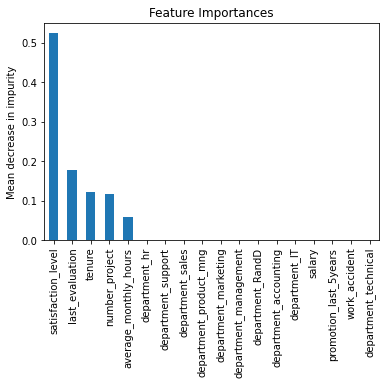

In [67]:

# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf_dt.best_estimator_, X)

Constructing random forest model to avoid overfittting since random forest imcoorporate multiple decision trees

## Building random forest model 
- Construct random forest model and set up cross validation grid search to exhaustively search for the best model parameters 
    

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
%time

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.82 µs


In [71]:
from sklearn.model_selection import GridSearchCV
# Instantiate model
random_forest = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
clf_rf = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc', verbose=1)


In [72]:
clf_rf.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  9.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
import os

path = r'C:\D DRIVE THINGS\Google data analytics\google analytics model\\'
filename = 'hr_clf_rf.pickle'
full_path = os.path.join(path, filename)

print("File exists:", os.path.isfile(full_path))
print("Full path:", full_path)

In [73]:

# Check best AUC score on CV
clf_rf.best_score_

0.9804250949807172

In [74]:
# Check best params
clf_rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [75]:

# Get all CV scores
cv_results_rf = make_results('Random Forest CV', clf_rf, 'auc')
cv_results_rf

,Model,Precision,Recall,F1,Accuracy,AUC
0,Random Forest CV,0.950023,0.915614,0.932467,0.977983,0.980425


In [76]:

# Combine new scores with results
cv_results = pd.concat([cv_results, cv_results_rf]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,Random Forest CV,0.950023,0.915614,0.932467,0.977983,0.980425
1,Decision Tree CV,0.914552,0.916949,0.915707,0.971978,0.969819
2,Logistic Regression,0.454082,0.178715,0.256484,0.827885,0.567957


In [77]:
import pickle

# Save the best model from GridSearchCV
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(clf_rf.best_estimator_, file)


In [78]:
# Load the model
with open('best_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it to predict
y_pred = loaded_model.predict(X_test)



The evaluation scores of the Random Forest model are better than those of the Decision Tree model, with the exception of recall (the recall score of the Random Forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the Random Forest model mostly outperforms the Decision Tree model.

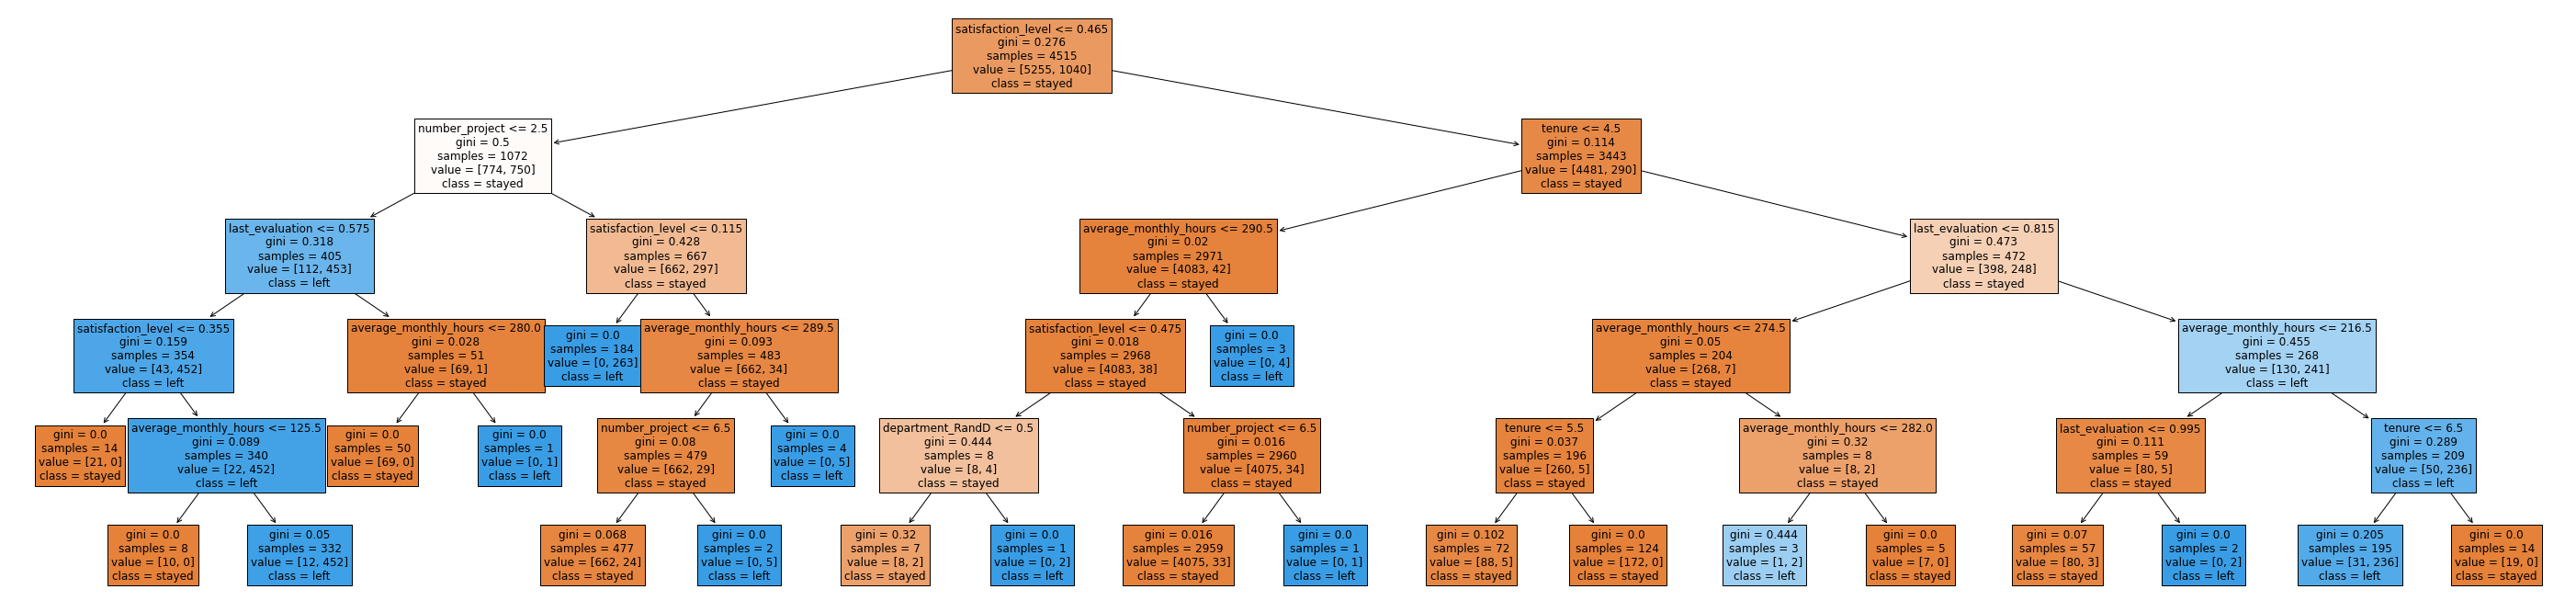

In [79]:
# Plot the tree
plt.figure(figsize=(50,12))
plot_tree(clf_rf.best_estimator_[0], max_depth=5, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()



This plot tells us that when doing a single split on a single variable, the one that would most help us predict whether an employee will leave is again then satisfaction_level. number_project and tenure also are both strong predictors again.

In [80]:
rf_importances = model_importances(clf_rf.best_estimator_[0], X)

# Display `feature_importances`
rf_importances

,gini_importance
satisfaction_level,0.533382
last_evaluation,0.147890
tenure,0.120581
number_project,0.120127
average_monthly_hours,0.076622
department_RandD,0.001397


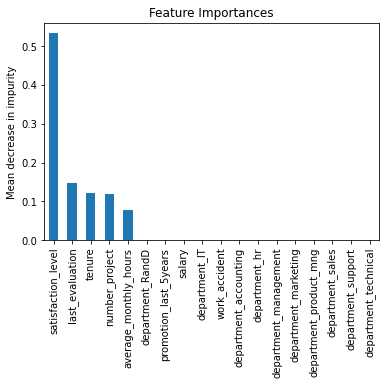

In [81]:
model_importances_plot(clf_rf.best_estimator_[0], X)

Using a random forest model, we again see that these are the predictive features: satisfaction_level, last_evaluation, tenure, number_project, and average_monthly_hours. department_RandD shows up but it is negligible.



##  C. Build XGBoost model


In [82]:
from xgboost import XGBClassifier

In [83]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [4, 8, 12],
#                 'min_child_weight': [3, 5],
#                 'learning_rate': [0.01, 0.1],
#                 'n_estimators': [300, 500]
#                 }

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5, 10, 15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate the GridSearchCV object
clf_xgb = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc',n_jobs=-1, verbose=1)

In [88]:
%time

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 13.8 µs


In [89]:
clf_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   30.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'm

In [90]:
clf_xgb.best_score_


0.9814922590589064

In [91]:
clf_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 15,
 'subsample': 0.7}

In [96]:
# Assuming clf_xgb is already fitted and has best_params_
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(clf_xgb, file)

In [97]:
with open('best_xgb_estimator.pkl', 'wb') as file:
    pickle.dump(clf_xgb.best_estimator_, file)


In [99]:
# Load the best model
with open('best_xgb_estimator.pkl', 'rb') as file:
    loaded_xgb = pickle.load(file)

# Use for prediction
y_pred = loaded_xgb.predict(X_test)


In [100]:

# Get all CV scores
cv_results_xgb = make_results('XGBoost CV', clf_xgb, 'auc')
cv_results_xgb

,Model,Precision,Recall,F1,Accuracy,AUC
0,XGBoost CV,0.97341,0.906898,0.93893,0.980429,0.981492


In [101]:
# Combine new scores with results
cv_results = pd.concat([cv_results, cv_results_xgb]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,XGBoost CV,0.973410,0.906898,0.938930,0.980429,0.981492
1,Random Forest CV,0.950023,0.915614,0.932467,0.977983,0.980425
2,Decision Tree CV,0.914552,0.916949,0.915707,0.971978,0.969819
3,Logistic Regression,0.454082,0.178715,0.256484,0.827885,0.567957


The evaluation scores of the XGBoost model are better than those of the Random Forest model, with the exception of recall (the recall score of the XGBoost model is approximately 0.09 lower. This indicates that the XGBoost model mostly outperforms the Random Forest model.

This Python environment does not have the package graphviz installed so we are not able to plot the tree for the XGBoost model.

Find feature_importances_ of the XGBoost model sorted by gini.

In [102]:

# Find `feature_importances`
xgb_importances = model_importances(clf_xgb.best_estimator_, X)

# Display `feature_importances`
xgb_importances

,gini_importance
satisfaction_level,0.457480
number_project,0.170826
tenure,0.157534
last_evaluation,0.091238
average_monthly_hours,0.076235
work_accident,0.021453
salary,0.014138
department_support,0.007353
department_sales,0.003743


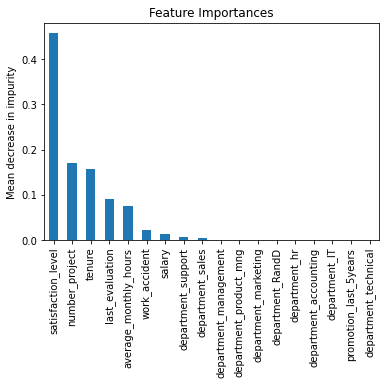

In [103]:
# Plot and display `feature_importances_` attribute relative to each feature
model_importances_plot(clf_xgb.best_estimator_, X)

# XGBoost has built in plot method to show `feature_importances`
#ax = plot_importance(clf_xgb.best_estimator_, importance_type='gain')
#fig = ax.figure
#fig.set_size_inches(10, 8)


Using an XGBoost model, we see that the main predictive features are there again but in different order: satisfaction_level, number_project, tenure, last_evaluation, and average_monthly_hours.

The new features that appear are: work_accident, salary, department_support, and department_sales.

In [105]:
# function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [106]:
test_scores_xgb = get_scores('XGBoost (test)', clf_xgb, X_test, y_test)
test_scores_xgb

,Model,Precision,Recall,F1,Accuracy,AUC
0,XGBoost (test),0.976293,0.909639,0.941788,0.981321,0.952619


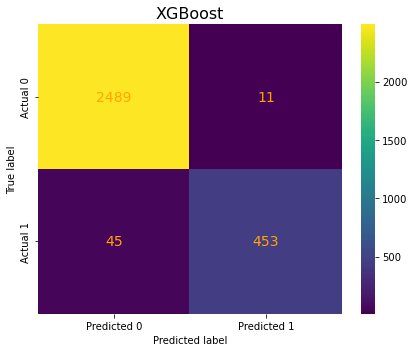

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict
y_pred = clf_xgb.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            annot_kws={"size": 14, "color": "orange"})

plt.title('XGBoost', fontsize=16)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


In [111]:
y_pred_xgb = clf_xgb.best_estimator_.predict(X_test)

In [112]:

# Create a classification report for XGBoost model
target_labels = ['stayed', 'left']
cr_best_model = classification_report(y_test, y_pred_xgb, target_names=target_labels, digits=6)

# Display classification report
print(cr_best_model)

              precision    recall  f1-score   support

      stayed   0.982242  0.995600  0.988876      2500
        left   0.976293  0.909639  0.941788       498

    accuracy                       0.981321      2998
   macro avg   0.979267  0.952619  0.965332      2998
weighted avg   0.981253  0.981321  0.981054      2998



In [113]:
cv_results = pd.concat([cv_results, test_scores_xgb]).sort_values(by=['AUC'], ascending=False).reset_index(drop=True)

# Display results of new dataframe
cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,XGBoost CV,0.973410,0.906898,0.938930,0.980429,0.981492
1,Random Forest CV,0.950023,0.915614,0.932467,0.977983,0.980425
2,Decision Tree CV,0.914552,0.916949,0.915707,0.971978,0.969819
3,XGBoost (test),0.976293,0.909639,0.941788,0.981321,0.952619
4,Logistic Regression,0.454082,0.178715,0.256484,0.827885,0.567957


The XGBoost (test) scores are very similar to the XGBoost cross-validation (CV) scores, so this appears to be a strong model. Since the test set was only used for this model, we can be more confident that the model's performance on this data is representative of how it will perform on new, unseeen data.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




# Logistic Regression
The logistic regression model achieved precision of 45.4%, recall of 17.8%, F1-score of 25.6% , accuracy of 82.7% ,and AUC of 56.7% , on the test set.

Scores are lower if we want to find employees that are predicted to leave.


### Tree-based Machine Learning



The best tree-based model is XGBoost.

XGBoostCV achieved AUC of 98.1%, precision of 97.3%, recall of 90.7%, F1-score of 93.9%, and accuracy of 98.0%, on the test set.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at Salifort Motors are overworked.

The following recommendations could be help retain employees:

Cap the number of projects that employees can work on. 3-4 projects seems to be optimal.
Consider promoting employees who have been with the company for at least 4 years, and investigate why 4-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.




#### Next steps
It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, we could try building a K-means model on this data and analyzing the clusters because of the odd distribution for satisfaction level, evaluation scores, and average monthly hours worked.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.